In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
n_samples = 1000

X, y = make_circles(n_samples,noise=0.03,random_state=42)

# check the feature x
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# check the feature y
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

#### In order to understand the data better it's good to visualize the data

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "Label":y})

In [6]:
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


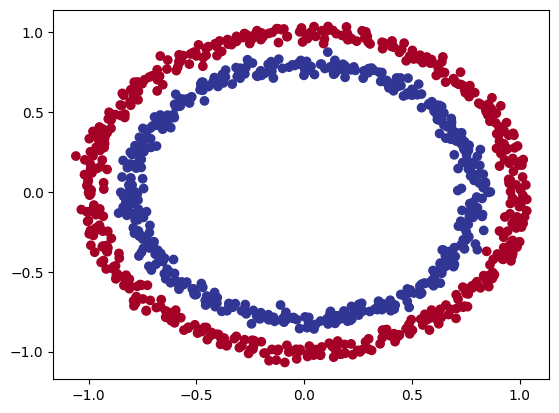

In [7]:
# Visualize using a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

### Steps in Modeling
1. Create the model
2. compile the model
3. fit the model
4. Evaluate the model
5. Tweak the model for better performance
6. Evaluate the model

In [8]:
# set the random seed
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy'])

model.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.7458 - accuracy: 0.4720
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 4.2535 - accuracy: 0.4740
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 3.2321 - accuracy: 0.4750
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7830 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7164 - accuracy: 0.4900


In [9]:
model.fit(X,y,epochs=200, verbose=0)

In [10]:
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model_2.fit(X,y,epochs=100, verbose=0)

In [12]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932725310325623, 0.5]

### Create  a new model_3 to have a better model from last 2 models

In [13]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X,y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 2.6674 - accuracy: 0.4520
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7629 - accuracy: 0.4280
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7277 - accuracy: 0.4940
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7152 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7072 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7014 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 11/

In [14]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5010


[0.6952093839645386, 0.5009999871253967]

In [15]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.47361755],
       [0.5337984 ],
       [0.5368314 ],
       [0.5345368 ],
       [0.45364267],
       [0.5376103 ],
       [0.5220383 ],
       [0.47046363],
       [0.48194116],
       [0.5328556 ],
       [0.508775  ],
       [0.49913147],
       [0.5271602 ],
       [0.4579954 ],
       [0.45609897],
       [0.46794805],
       [0.5268001 ],
       [0.47052225],
       [0.52896565],
       [0.5028933 ],
       [0.48525634],
       [0.5461956 ],
       [0.46990773],
       [0.47558257],
       [0.5489799 ],
       [0.54262257],
       [0.5147618 ],
       [0.45942432],
       [0.46511397],
       [0.45730034],
       [0.48473495],
       [0.53626335],
       [0.52054924],
       [0.4568648 ],
       [0.4706467 ],
       [0.55070037],
       [0.53818935],
       [0.500354  ],
       [0.4654814 ],
       [0.4859376 ],
       [0.5001992 ],
       [0.5104115 ],
       [0.5078047 ],
       [0.45655572],
       [0.5156018 ],
       [0.5255209 ],
       [0.45683616],
       [0.511

### All of the preditctions are arround 0.5 but let's see this visually.

Lets create a plotting fuction called plot_decision_boundry(). This function will

1. Take in trained model, Feature X and labels y
2. create a meshGrid

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x_in)

    y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


313/313 [==============================] - 0s 1ms/step


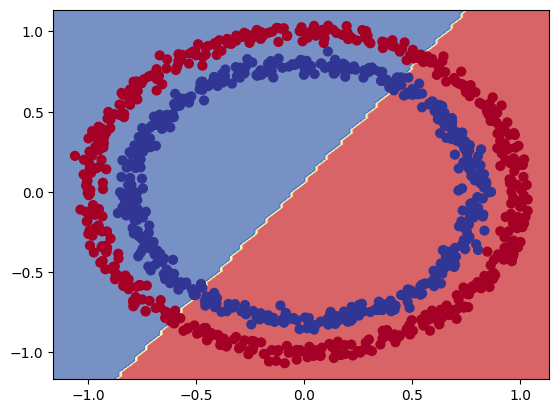

In [18]:
plot_decision_boundary(model=model_3,X=X,y=y)

In [19]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [20]:
np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

[array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

## Lets see if our model can work with regression data

In [21]:
tf.random.set_seed(42)

X_regression = tf.range(1,1000, 5)
y_regression = tf.range(100,1100,5) 

# Relateion between X and Y is y = x + 100

# Lets split our data into test and train data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:] 

# Reshape input data for the model
# X_reg_train = tf.reshape(X_reg_train, (-1, 1))  # Reshape to (batch_size, input_shape)
# y_reg_train = tf.reshape(y_reg_train, (-1, 1))  # Reshape to (batch_size, input_shape)


In [22]:
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

#### We have compiled our model for a classification problem now we are dealing with regression problem, lets create a model to work with our regression data

In [23]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=600)

Epoch 1/600
5/5 [==============================] - 1s 2ms/step - loss: 522.7484 - mae: 522.7484
Epoch 2/600
5/5 [==============================] - 0s 2ms/step - loss: 468.0469 - mae: 468.0469
Epoch 3/600
5/5 [==============================] - 0s 2ms/step - loss: 416.2451 - mae: 416.2451
Epoch 4/600
5/5 [==============================] - 0s 2ms/step - loss: 362.4113 - mae: 362.4113
Epoch 5/600
5/5 [==============================] - 0s 2ms/step - loss: 305.1795 - mae: 305.1795
Epoch 6/600
5/5 [==============================] - 0s 2ms/step - loss: 241.1068 - mae: 241.1068
Epoch 7/600
5/5 [==============================] - 0s 2ms/step - loss: 171.4381 - mae: 171.4381
Epoch 8/600
5/5 [==============================] - 0s 2ms/step - loss: 94.9279 - mae: 94.9279
Epoch 9/600
5/5 [==============================] - 0s 2ms/step - loss: 46.2200 - mae: 46.2200
Epoch 10/600
5/5 [==============================] - 0s 2ms/step - loss: 67.3848 - mae: 67.3848
Epoch 11/600
5/5 [===========================

In [24]:
y_reg_pred = model_4.predict(X_reg_test)

2/2 [==============================] - 0s 3ms/step


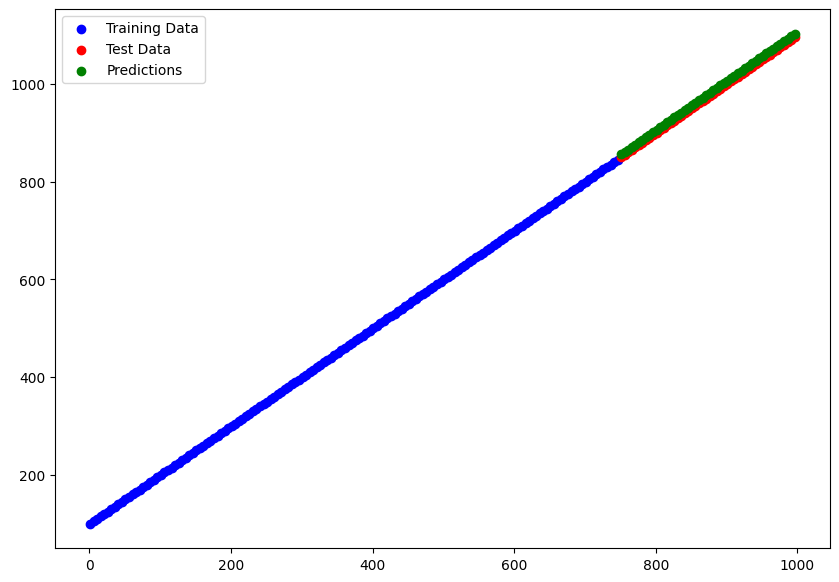

In [25]:
plt.figure(figsize=(10,7))

plt.scatter(X_reg_train,y_reg_train,c="b", label="Training Data")
plt.scatter(X_reg_test,y_reg_test, c='r', label="Test Data")
plt.scatter(X_reg_test,y_reg_pred, c='g', label="Predictions")
plt.legend()

## Non-Linearity

In [26]:
tf.random.set_seed(42)

# 1. Create a model

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, tf.keras.activations.linear)
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 5.5933 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.5756 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 5.5538 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.5177 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.4597 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.4166 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.3690 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 5.3287 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 5.3010 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 5.2531 - accuracy: 0.4750
Epoch 11/

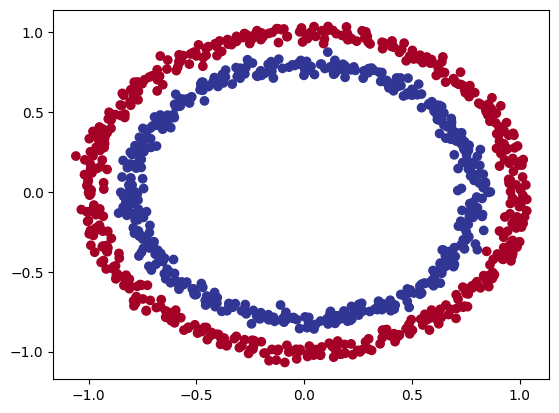

In [27]:
# Check our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 860us/step


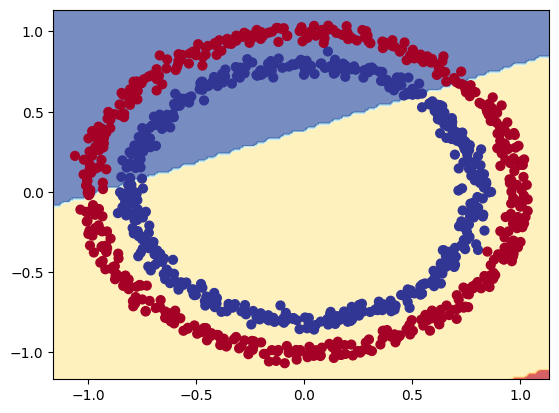

In [28]:
plot_decision_boundary(model_5,X,y)

# Lets build our first with a non-linear activation function

In [29]:
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model and save history
history = model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 5.8052 - accuracy: 0.4770
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7634 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7433 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7392 - accuracy: 0.4790
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7352 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7325 - accuracy: 0.4790
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7300 - accuracy: 0.4790
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6845 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6726 - accuracy: 0.4800
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6716 - accuracy: 0.4810
Epoch 11/

## Now lets create a new model with more hidden layers and using a Non linear activation fucntion

In [30]:
tf.random.set_seed(42)

# 1. create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model and save the history
history = model_7.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 3.8574 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 2.9396 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 2.3187 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 1.7288 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 1.1964 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 1.1373 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 1.1004 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 1.0700 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 1.0440 - accuracy: 0.4990
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 1.0206 - accuracy: 0.4920
Epoch 11/

313/313 [==============================] - 0s 915us/step


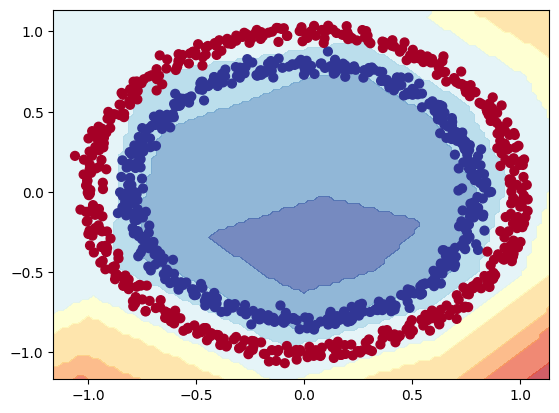

In [31]:
plot_decision_boundary(model_7, X,y)

In [32]:
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model and save the results 
history = model_8.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.5020
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5010
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5010
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.4890
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.4960
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5050
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5060
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5140
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5070
Epoch 11/

In [33]:
model_8.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1218 - accuracy: 0.9800


[0.12176293879747391, 0.9800000190734863]

313/313 [==============================] - 1s 2ms/step


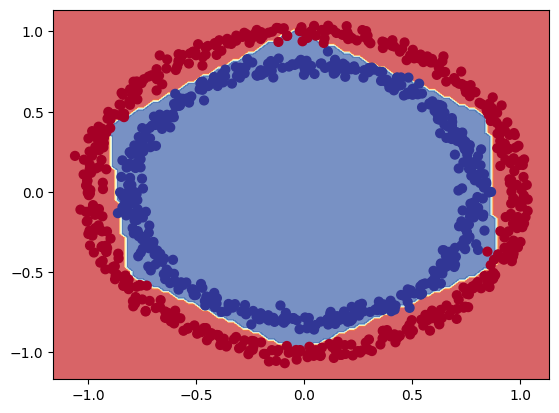

In [34]:
plot_decision_boundary(model_8,X,y)

# Create a toy tensor ( similar to our data  we passed into our model)

In [35]:
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

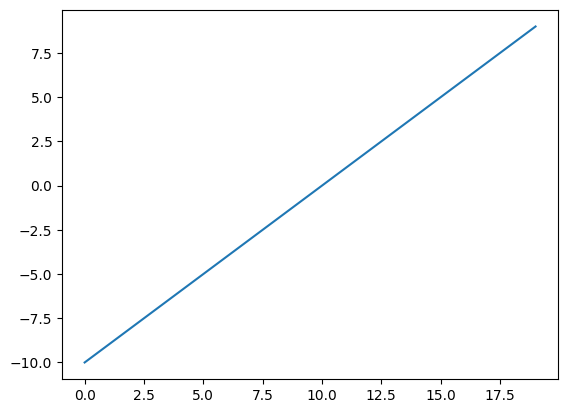

In [36]:
plt.plot(A)

In [37]:
# let's replicate our sigmoid activation function

def sigmoid(X):
    return 1 / (1 + tf.exp(-X))

sigmoid(X)

<tf.Tensor: shape=(1000, 2), dtype=float64, numpy=
array([[0.68010323, 0.55761316],
       [0.31948079, 0.5382399 ],
       [0.3067427 , 0.54321243],
       ...,
       [0.46582826, 0.30788798],
       [0.66158411, 0.31701982],
       [0.56980526, 0.72388687]])>

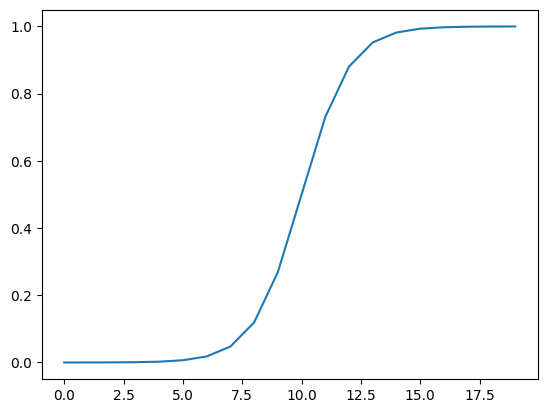

In [38]:
plt.plot(sigmoid(A))

In [39]:
# Lets recreate the Relu activation function
def relu(x):
    '''If the value is negetive it returns 0. If the value is Positive it returns 1'''
    return tf.maximum(0,x)
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [40]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

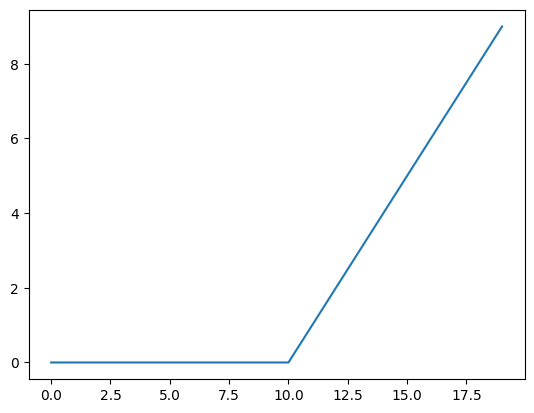

In [41]:
plt.plot(relu(A))

## Lets split our data into train and test set for validating the model performance

In [42]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [43]:
# Getting great results in less time by tweaking the learning rate

# set the random seed
tf.random.set_seed(42)

# 1. Create the Model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit the model and save the results 
history = model_9.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 2s 1ms/step - loss: 0.6930 - accuracy: 0.5013
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.5412
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5400
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6678 - accuracy: 0.6263
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6590 - accuracy: 0.5925
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6463 - accuracy: 0.6413
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.6950
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6084 - accuracy: 0.7088
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5655 - accuracy: 0.7588
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.7750
Epoch 11/25
25/25 [

In [44]:
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0792 - accuracy: 0.9950


[0.07915196567773819, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step


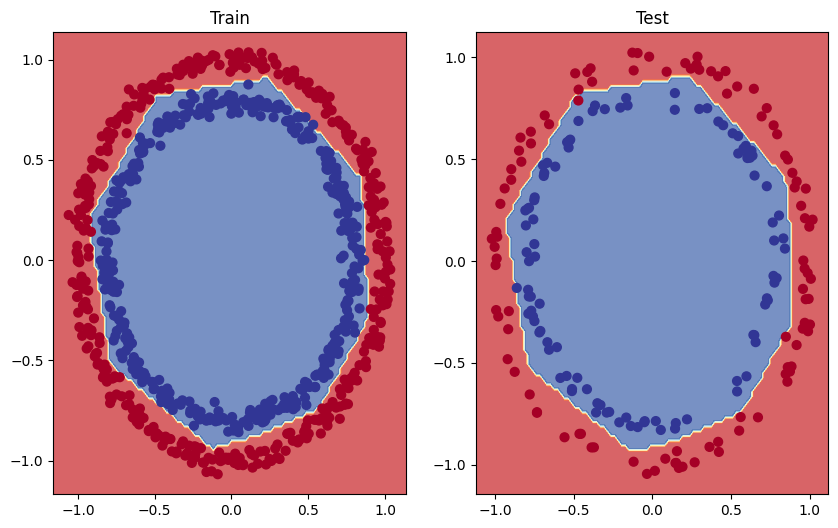

In [45]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9,X_test,y_test)

### Lets Look into Our history object

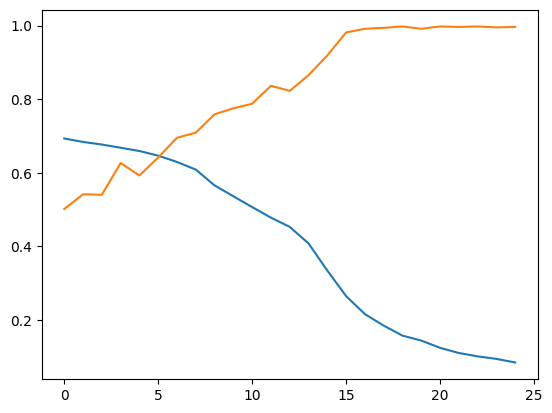

In [46]:
plt.plot(pd.DataFrame(history.history))

## Implementing a Learning rate callback

In [47]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=['accuracy'])

# 3. Create the learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_10 = model_10.fit(X_train,y_train, epochs=100,
                          callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 2s 1ms/step - loss: 0.7529 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7496 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7460 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7423 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7383 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7341 - accuracy: 0.5025 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7298 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7255 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='Epochs'>

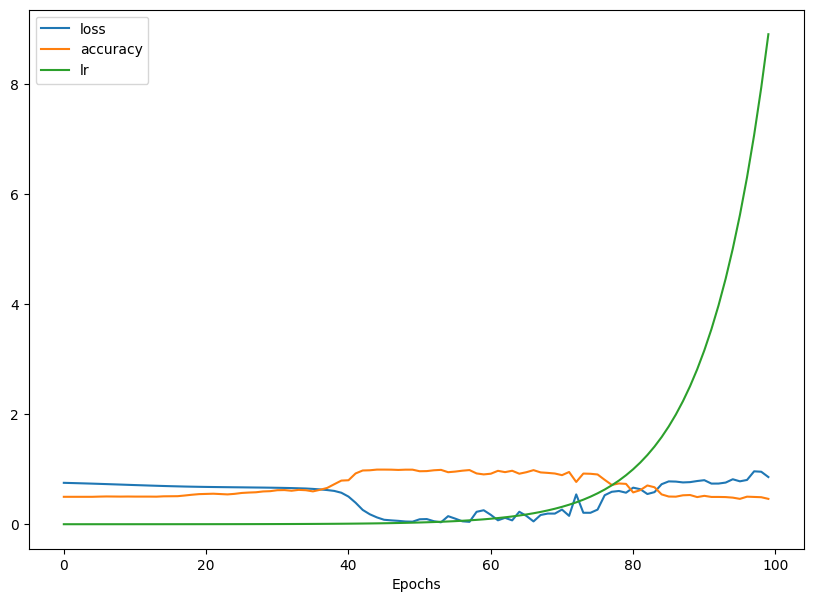

In [48]:
pd.DataFrame(history_10.history).plot(figsize=(10,7),xlabel="Epochs")

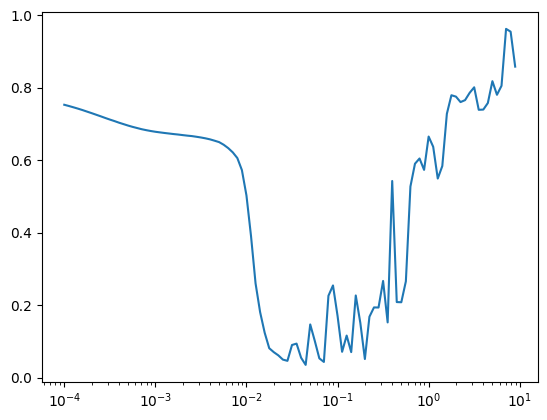

In [49]:
# Plot the learning rate vs the loss
lrs = 1e-4 * ( 10**(tf.range(100)/20))
plt.semilogx(lrs,history_10.history['loss'])

In [63]:
## Try to create a new model with new learning rate to check for accuracy 

# set the random seed
tf.random.set_seed(42)

# 1. Create the model

model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

# Fit the model
history_11 = model_11.fit(X_train,y_train,epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 5ms/step - loss: 0.7009 - accuracy: 0.4888
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.5188
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5312
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5325
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5400
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.5625
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.5663
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.5725
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.5763
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6348 - accuracy: 0.5900
Epoch 11/50
25/25 [

In [64]:
model_11.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9800


[0.06166249141097069, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step


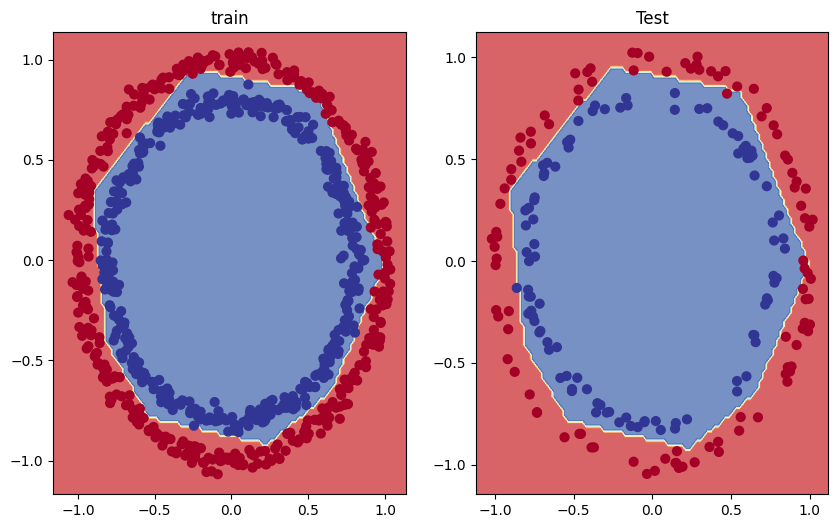

In [67]:
# PLot the decision boundary

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_11,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_11,X_test, y_test)

In [70]:
# Create a Confusion metric for our model predictions
y_pred_11 = model_11.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [75]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [76]:
y_pred_11

array([[9.99617338e-01],
       [9.99883592e-01],
       [9.99999106e-01],
       [9.84981537e-01],
       [9.02167678e-01],
       [4.29474516e-04],
       [9.95121121e-01],
       [5.46431169e-04],
       [9.99897897e-01],
       [8.12879225e-05],
       [9.94663417e-01],
       [1.06845476e-01],
       [9.99970138e-01],
       [9.58147347e-01],
       [9.57095325e-01],
       [9.68329966e-01],
       [9.76970792e-01],
       [9.97336984e-01],
       [4.04720521e-03],
       [9.99900818e-01],
       [3.36609897e-04],
       [9.93930817e-01],
       [9.99999523e-01],
       [9.98414576e-01],
       [6.59895013e-05],
       [9.97184873e-01],
       [9.85294700e-01],
       [9.16455034e-03],
       [4.92136814e-02],
       [9.90996897e-01],
       [5.41178174e-02],
       [9.84785438e-01],
       [9.60472226e-01],
       [6.12126514e-02],
       [8.55621696e-01],
       [9.93670106e-01],
       [9.99986649e-01],
       [9.31535602e-01],
       [9.99995768e-01],
       [9.99877334e-01],


In [84]:
np.round(y_pred_11[5])

array([0.], dtype=float32)

In [85]:
tf.math.confusion_matrix(y_test,np.round(y_pred_11))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[98,  3],
       [ 1, 98]])>